## Question 1.c

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

fea_1 = np.random.normal(50, 10, 200)
fea_2 = fea_1 * 2 + np.random.normal(0, 5, 200)

# Map fea_1 values to "lo", "me", or "hi"
bins = [-np.inf, 45, 55, np.inf]
labels = ["lo", "me", "hi"]
fea_3 = pd.cut(fea_1, bins=bins, labels=labels)

data = pd.DataFrame({'fea_1': fea_1, 'fea_2': fea_2, 'fea_3': fea_3})

# Introduce missing values in feature 1.
missing_indices = np.random.choice(200, 40, replace=False)
data.loc[missing_indices, 'fea_1'] = np.nan


In [82]:
data 

,fea_1,fea_2,fea_3
0,NaN,102.005059,me
1,45.881230,104.924371,me
2,45.123938,92.714465,me
3,45.674418,92.273017,me
4,NaN,103.597254,me
...,...,...,...
195,35.933389,73.083475,lo
196,40.767668,80.329155,lo
197,36.483154,74.726585,lo
198,40.241267,74.224838,lo


In [7]:
# count missing values in each column
n_missing_1 = data['fea_1'].isnull().sum()
n_missing_2 = data['fea_2'].isnull().sum()
n_missing_3 = data['fea_3'].isnull().sum()
# print out
print("Number of missing values in feature 1: ", n_missing_1)
print("Number of missing values in feature 2: ", n_missing_2)
print("Number of missing values in feature 3: ", n_missing_3)

Number of missing values in feature 1:  40
Number of missing values in feature 2:  0
Number of missing values in feature 3:  0


Text(0.5, 1.0, 'Single value imputed feature 1')

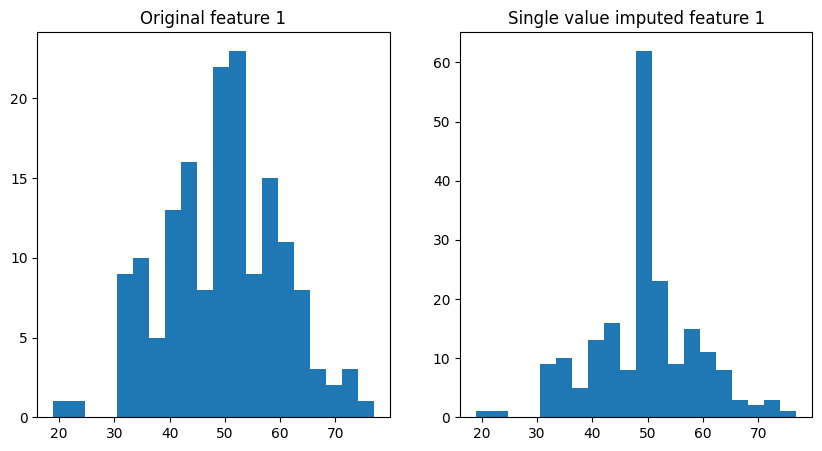

In [8]:
# try single value imputation
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].hist(data['fea_1'], bins=20)
ax[1].hist(data['fea_1'].fillna(data['fea_1'].mean()), bins=20)
ax[0].set_title('Original feature 1')
ax[1].set_title('Single value imputed feature 1')

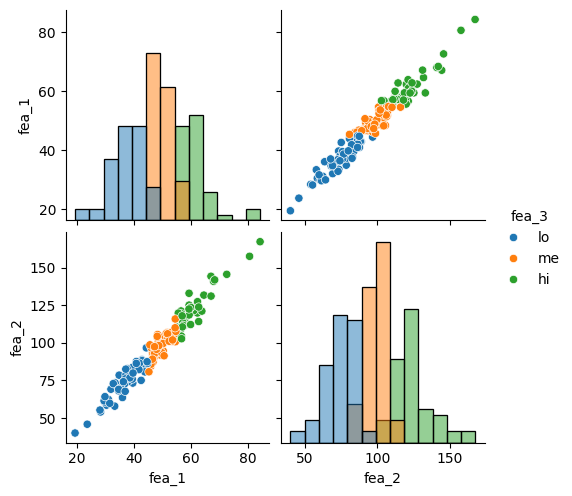

In [11]:
# pair plots to see if there is any correlation between features
sns.pairplot(data, hue='fea_3', diag_kind='hist')

C:\Users\nomou\AppData\Local\Temp\ipykernel_25240\2765451060.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model_based_imputed.fea_1[indexna] = df_model_based_imputed.fea_2[indexna]/delta


Text(0.5, 1.0, 'Model based imputed feature 1')

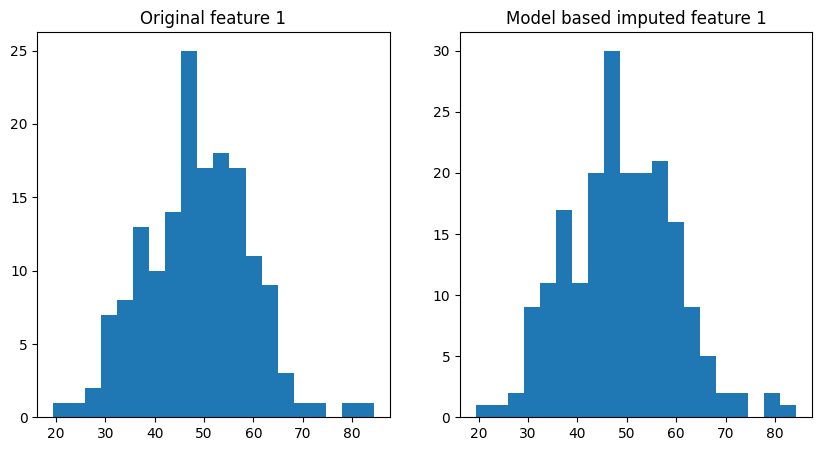

In [14]:
# do a simple model imputation 
df_clean = data.dropna()
mu  = np.mean(df_clean['fea_2']/df_clean['fea_1'])
std = np.std(df_clean['fea_2']/df_clean['fea_1'])
nna     = data.fea_1.isnull().sum()
indexna = data[data.fea_1.isnull()].index
# sample normal distribution
delta = np.random.normal(mu,std,size=nna)
df_model_based_imputed = data.copy()
df_model_based_imputed.fea_1[indexna] = df_model_based_imputed.fea_2[indexna]/delta

# plot the imputed feature 1
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].hist(data['fea_1'], bins=20)
ax[1].hist(df_model_based_imputed['fea_1'], bins=20)
ax[0].set_title('Original feature 1')
ax[1].set_title('Model based imputed feature 1')

## Question 2

In [15]:
# Generate the data
np.random.seed(42)

# Generate continuous features
feature_1 = np.random.normal(loc=50, scale=10, size=200)
feature_2 = feature_1 * 2 + np.random.normal(loc=0, scale=5, size=200)

# Introduce outliers
feature_1[[5, 50, 100]] = [100, 3, 120]
feature_2[[5, 50, 100]] = [250, 0, 230]

# Generate categorical feature with three categories
feature_3 = np.random.choice(["Blue", "Red", "Yellow"], 200, p=[0.4, 0.3, 0.3])


data_ex2 = pd.DataFrame({'feature_1': feature_1, 'feature_2': feature_2, 'feature_3': feature_3})
data_ex2['feature_3'] = data_ex2['feature_3'].astype('category')

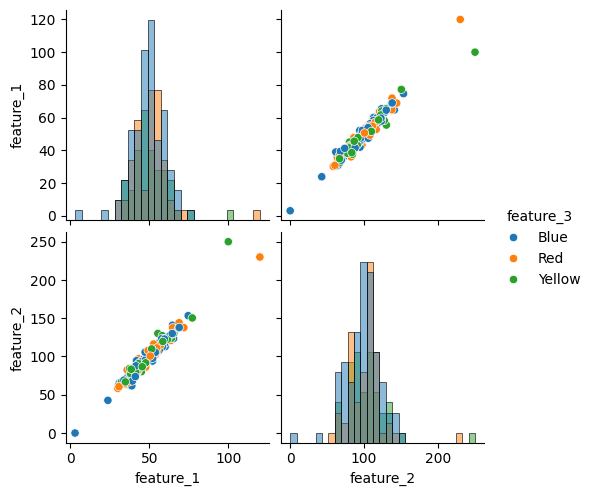

In [16]:
# visualize
sns.pairplot(data_ex2, hue='feature_3', diag_kind='hist')

Clearly we identify outliers. We can test this hypothesis by measuring their distance from the mean and comparing it to the standard deviation. 

Text(0.5, 1.0, 'Z score feature 2')

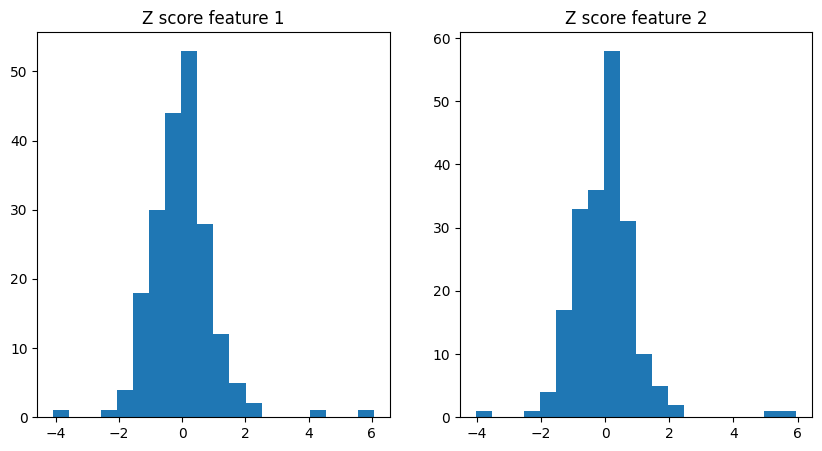

In [17]:
# for feature 1
mu = np.mean(data_ex2['feature_1'])
std = np.std(data_ex2['feature_1'])
# calculate z score
z_score_1 = (data_ex2['feature_1'] - mu)/std
# for feature 2
mu = np.mean(data_ex2['feature_2'])
std = np.std(data_ex2['feature_2'])
# calculate z score
z_score_2 = (data_ex2['feature_2'] - mu)/std

# plot both
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].hist(z_score_1, bins=20)
ax[1].hist(z_score_2, bins=20)
ax[0].set_title('Z score feature 1')
ax[1].set_title('Z score feature 2')

In [84]:
# remove the outliers
data_ex2_clean = data_ex2[(z_score_1.abs() < 3) & (z_score_2.abs() < 3)]
# assess effect on mean and std
print("Mean feature 1 before and after: ", np.mean(data_ex2['feature_1']), np.mean(data_ex2_clean['feature_1']))
# do the same with the median
print("Median feature 1 before and after: ", np.median(data_ex2['feature_1']), np.median(data_ex2_clean['feature_1']),"\n\n")
print("Std feature 1 before and after: ", np.std(data_ex2['feature_1']), np.std(data_ex2_clean['feature_1']))
print("Mean feature 2 before and after: ", np.mean(data_ex2['feature_2']), np.mean(data_ex2_clean['feature_2']))
print("Std feature 2 before and after: ", np.std(data_ex2['feature_2']), np.std(data_ex2_clean['feature_2']))

Mean feature 1 before and after:  50.023561534759395 49.65336196422273
Median feature 1 before and after:  50.09057674260184 50.05113456642461 


Std feature 1 before and after:  11.548703582937657 9.300933528472473
Mean feature 2 before and after:  100.72215660414247 99.81944832907865
Std feature 2 before and after:  25.050500444090357 19.6677213134348


## Question 3

In [34]:
# generate the data
my_x = np.arange(1, 101)
my_y_linear     = 2 * my_x + 1
my_y_quadratic  = my_x**2 + 5 * my_x + 9
my_y_polynomial = my_x**3 + 5 * my_x**2 - 3 * my_x + 11
my_y_log        = np.log(my_x + 1)
my_y_exp        = np.exp(my_x / 10)

data_raw = {'x': my_x, 'y_linear': my_y_linear, 'y_quadratic': my_y_quadratic, 'y_polynomial': my_y_polynomial, 'y_log': my_y_log, 'y_exp': my_y_exp}

def generate_data(key):
    x = data_raw['x']
    y = data_raw[key]
    return pd.DataFrame({'x': x, 'y': y})

Text(0, 0.5, 'MSE')

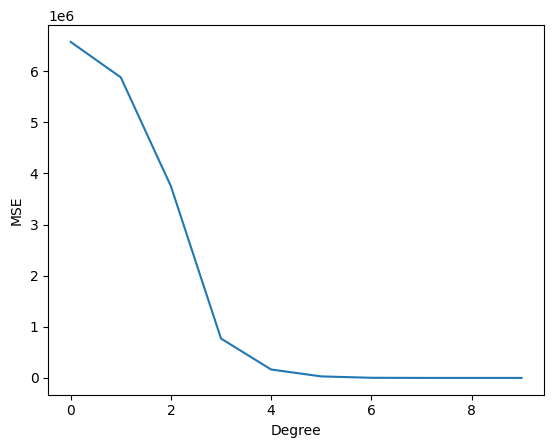

In [50]:
from sklearn.model_selection import train_test_split

key = 'y_exp'

mse_list = []

# loop over degrees (no cross validation)
for degree in range(10):
    # generate data
    data = generate_data(key)
    # split into train and test
    train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
    # fit model
    model = np.polyfit(train_data['x'], train_data['y'], degree)
    # predict
    y_pred = np.polyval(model, test_data['x'])
    # calculate mse
    mse = np.mean((y_pred - test_data['y'])**2)
    mse_list.append(mse)

# plot the mse
plt.plot(mse_list)
plt.xlabel('Degree')
plt.ylabel('MSE')

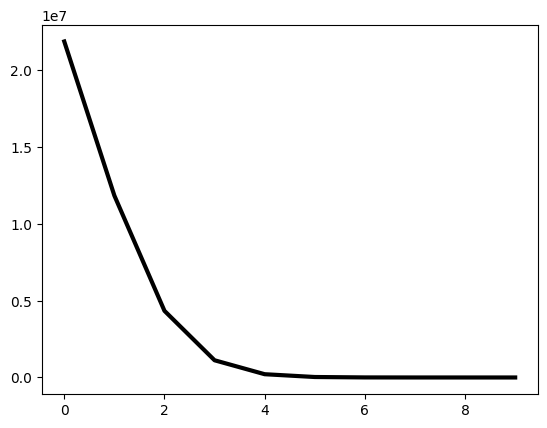

In [86]:
# repeat the above with leave one out cross validation
from sklearn.model_selection import LeaveOneOut

key = 'y_exp'

mse_list = []

# loop over degrees (LOO cross validation)
for degree in range(10):
    # generate data
    data = generate_data(key)
    # Loo split
    loo = LeaveOneOut()
    loocv_mse_list = []
    for train_index, test_index in loo.split(data):
        train_data, test_data = data.iloc[train_index], data.iloc[test_index]
        # fit model
        model = np.polyfit(train_data['x'], train_data['y'], degree)
        # predict
        y_pred = np.polyval(model, test_data['x'])
        # calculate mse
        mse = np.mean((y_pred - test_data['y'])**2)
        loocv_mse_list.append(mse)
    
    mse_list.append(loocv_mse_list)

mse_list = np.array(mse_list).T

'''
# plot the mse
for i in range(len(mse_list)):
    plt.plot(mse_list[i])
'''
# plot the mean mse
plt.plot(np.mean(mse_list, axis=0), color='black', linewidth=3)


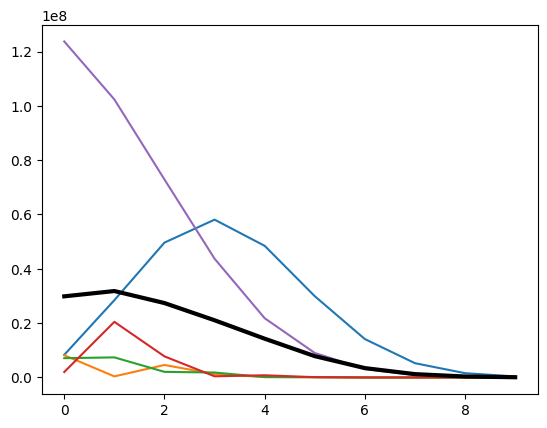

In [88]:
# repeat with k-fold cross validation
from sklearn.model_selection import KFold

key = 'y_exp'

mse_list = []

# loop over degrees (k-fold cross validation)
for degree in range(10):
    # generate data
    data = generate_data(key)
    # k-fold split
    kf = KFold(n_splits=5)
    kf_mse_list = []
    for train_index, test_index in kf.split(data):
        train_data, test_data = data.iloc[train_index], data.iloc[test_index]
        # fit model
        model = np.polyfit(train_data['x'], train_data['y'], degree)
        # predict
        y_pred = np.polyval(model, test_data['x'])
        # calculate mse
        mse = np.mean((y_pred - test_data['y'])**2)
        kf_mse_list.append(mse)
    
    mse_list.append(kf_mse_list)

mse_list = np.array(mse_list).T 


# plot the mse
for i in range(len(mse_list)):
    plt.plot(mse_list[i])


# plot the mean mse
plt.plot(np.mean(mse_list, axis=0), color='black', linewidth=3)

## Question 4

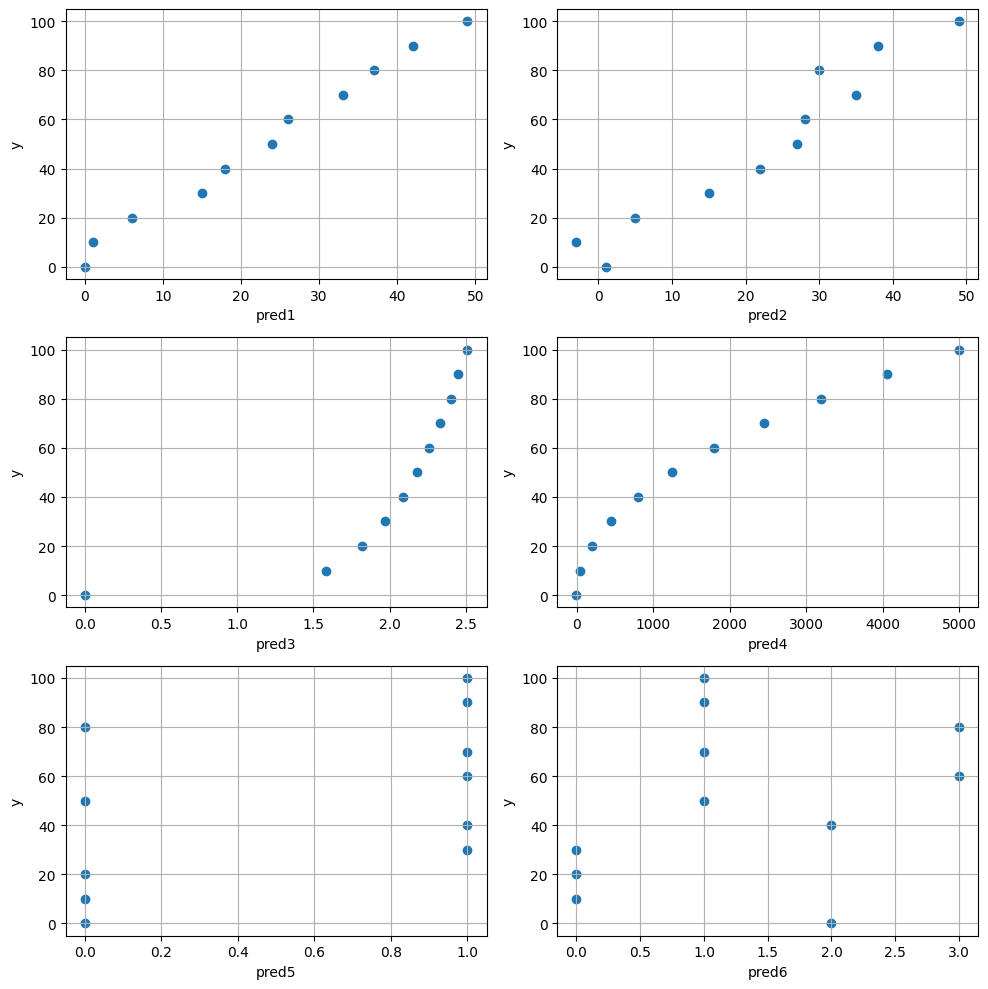

In [90]:
# load the data
df = pd.read_csv('material.csv')
df['pred5'] = np.array([0,0,0,1,1,0,1,1,0,1,1])
df['pred6'] = np.array([2,0,0,0,2,1,3,1,3,1,1])

predictors = ['pred1', 'pred2', 'pred3', 'pred4','pred5','pred6']

# Create scatter plots for y against each predictor
fig,ax = plt.subplots(3,2,figsize=(10,10))
ax = ax.flatten()
for i,predictor in enumerate(predictors):
    ax[i].scatter(df[predictor], df['y'])
    ax[i].set_xlabel(predictor)
    ax[i].set_ylabel('y')
    ax[i].grid(True)

plt.tight_layout()


 LINEAR REGRESSION (MSE)

 -- pred1 :  A  =  4.4243431992018785 
             B  =  1.9973395410708341 
             R² =  0.9914067176587965

 -- pred2 :  A  =  6.0244845360824755 
             B  =  1.958423765599566 
             R² =  0.9347022517634291

 -- pred3 :  A  =  -22.753990125365235 
             B  =  37.067804139834074 
             R² =  0.6288047502266378

 -- pred4 :  A  =  17.60650518969873 
             B  =  0.018551043466957202 
             R² =  0.9277714129524696

 -- pred5 :  A  =  31.999999999999996 
             B  =  33.00000000000001 
             R² =  0.27000000000000013

 -- pred6 :  A  =  38.507462686567166 
             B  =  9.029850746268655 
             R² =  0.0902985074626867


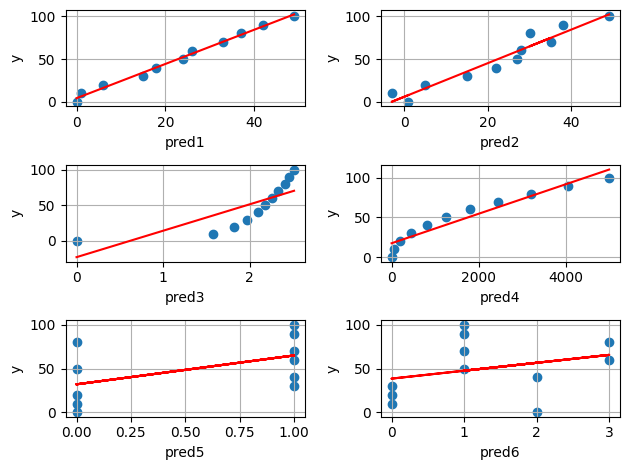

In [62]:
# compute the simple linear regression coefficients and R² for each predictor
fig, ax = plt.subplots(3,2)
ax = ax.flatten()
for i,predictor in enumerate(predictors):
    ax[i].scatter(df[predictor], df['y'])
    ax[i].set_xlabel(predictor)
    ax[i].set_ylabel('y')
    ax[i].grid(True)
    

print('\n LINEAR REGRESSION (MSE)')
ahat_list = []
bhat_list = []
for i,predictor in enumerate(predictors):
    x     = df[predictor]
    y     = df['y']
    xbar  = x.mean()
    ybar  = y.mean()
    xybar = (x*y).mean()
    x2bar = (x**2).mean()
    y2bar = (y**2).mean()

    bhat = ((x - xbar)*(y - ybar)).sum()/((x - xbar)**2).sum()
    ahat = ybar - bhat * xbar
    R2   = (xybar - xbar * ybar)**2/((x2bar - xbar**2)*(y2bar - ybar**2))

    print('\n -- ' + predictor + ' : ' + ' A  = ' ,ahat,
          '\n             B  = ',bhat,
          '\n             R² = ',R2)
    
    ax[i].plot(x,ahat+bhat*x,c='r',label='MSE (linear)')

    ahat_list.append(ahat)
    bhat_list.append(bhat)

plt.tight_layout()



LINEAR REGRESSION ON LOG(Y) FOR PRED3

 -- pred3 :  A  =  -1.4943928627451584 
             B  =  2.458276615584417 
             R² =  0.9953208203239585

LINEAR REGRESSION ON Y² FOR PRED4

 -- pred4 :  A  =  8.223505532539548 
             B  =  1.9996637567233477 
             R² =  0.9999988261706767


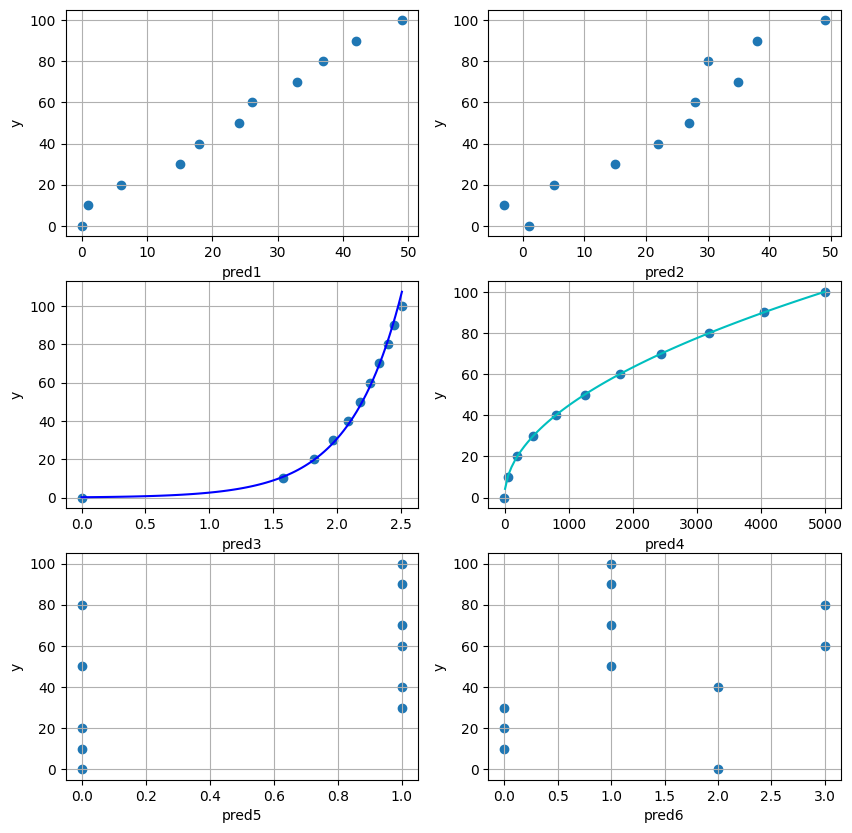

In [91]:
fig, ax = plt.subplots(3,2,figsize=(10,10))
ax = ax.flatten()
for i,predictor in enumerate(predictors):
    ax[i].scatter(df[predictor], df['y'])
    ax[i].set_xlabel(predictor)
    ax[i].set_ylabel('y')
    ax[i].grid(True)

# fit exponential model to predictor 3
print("\nLINEAR REGRESSION ON LOG(Y) FOR PRED3")
x     = df['pred3'][1:]
y     = np.log(df['y'][1:])
xbar  = x.mean()
ybar  = y.mean()
xybar = (x*y).mean()
x2bar = (x**2).mean()
y2bar = (y**2).mean()

bhat = ((x - xbar)*(y - ybar)).sum()/((x - xbar)**2).sum()
ahat = ybar - bhat * xbar
R2   = (xybar - xbar * ybar)**2/((x2bar - xbar**2)*(y2bar - ybar**2))

print('\n -- ' + 'pred3' + ' : ' + ' A  = ' ,ahat,
        '\n             B  = ',bhat,
        '\n             R² = ',R2)
x = np.linspace(df['pred3'].min(),df['pred3'].max(),100)
ax[2].plot(x,np.exp(ahat + bhat*x),c='b',label='MSE (non-linear)')

# fit sqrt model to predictor 4
print("\nLINEAR REGRESSION ON Y² FOR PRED4")
x     = df['pred4']
y     = df['y']**2
xbar  = x.mean()
ybar  = y.mean()
xybar = (x*y).mean()
x2bar = (x**2).mean()
y2bar = (y**2).mean()

bhat = ((x - xbar)*(y - ybar)).sum()/((x - xbar)**2).sum()
ahat = ybar - bhat * xbar
R2   = (xybar - xbar * ybar)**2/((x2bar - xbar**2)*(y2bar - ybar**2))

print('\n -- ' + 'pred4' + ' : ' + ' A  = ' ,ahat,
        '\n             B  = ',bhat,
        '\n             R² = ',R2)
x = np.linspace(df['pred4'].min()*-1,df['pred4'].max(),100)
ax[3].plot(x,np.sqrt(ahat + bhat*x),c='c',label='MSE (non-linear)')




 LINEAR REGRESSION (MAE)

 -- pred1 :  A  =  4.42396590310844 
             B  =  1.987152546919071

 -- pred2 :  A  =  5.981564292492384 
             B  =  1.9187435857444577

 -- pred3 :  A  =  -22.92401806105003 
             B  =  36.692043387443405

 -- pred4 :  A  =  17.60654514124773 
             B  =  0.01952235758991096

 -- pred5 :  A  =  26.99999999509674 
             B  =  33.00000000000001

 -- pred6 :  A  =  32.91044775550214 
             B  =  9.029850746268655


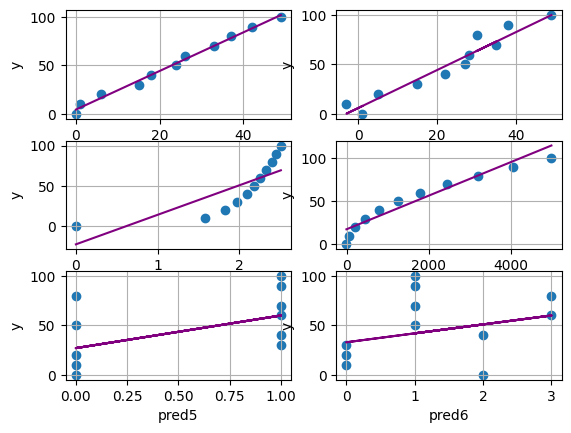

In [66]:
from scipy.optimize import minimize

fig, ax = plt.subplots(3,2)
ax = ax.flatten()
for i,predictor in enumerate(predictors):
    ax[i].scatter(df[predictor], df['y'])
    ax[i].set_xlabel(predictor)
    ax[i].set_ylabel('y')
    ax[i].grid(True)

# now numerically minimize MAE
def mae(params,x,y):
    a,b = params
    yhat = a + b*x
    return np.mean(np.abs(y - yhat))

print('\n LINEAR REGRESSION (MAE)')
for i,predictor in enumerate(predictors):
    x      = df[predictor]
    y      = df['y']
    initial_guess = [ahat_list[i],bhat_list[i]]
    result = minimize(mae,x0=initial_guess,args=(x,y))

    ahat,bhat = result.x

    print('\n -- ' + predictor + ' : ' + ' A  = ' ,ahat,
          '\n             B  = ',bhat)
    
    ax[i].plot(x,ahat+bhat*x,c='purple',label='MAE (linear)')



 LINEAR REGRESSION (HUBER LOSS delta=1.35)

 -- pred1 :  A  =  5.134000867905459 
             B  =  1.9819999688275765

 -- pred2 :  A  =  3.9881023910904445 
             B  =  1.9568025409896475

 -- pred3 :  A  =  -102.25024990225518 
             B  =  71.83606912515351

 -- pred4 :  A  =  22.038622620484826 
             B  =  0.017744642123804884

 -- pred5 :  A  =  19.999995240104223 
             B  =  41.8075998428846

 -- pred6 :  A  =  30.00000138424106 
             B  =  10.64443478676764


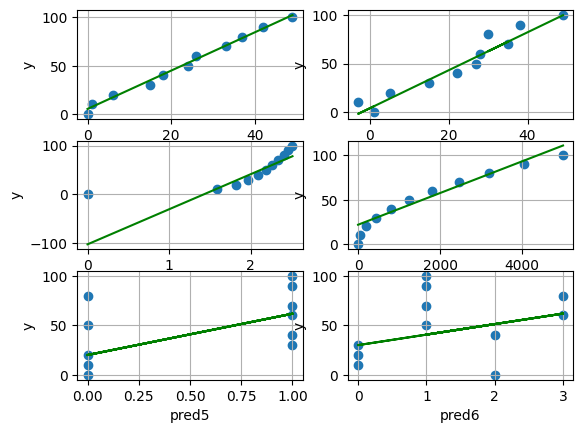

In [67]:
import scipy 

fig, ax = plt.subplots(3,2)
ax = ax.flatten()
for i,predictor in enumerate(predictors):
    ax[i].scatter(df[predictor], df['y'])
    ax[i].set_xlabel(predictor)
    ax[i].set_ylabel('y')
    ax[i].grid(True)

# numerically minimize Huber loss
def huber_loss(params,x,y):
    a,b  = params
    yhat = a + b*x
    return np.sum(scipy.special.huber(1.35,y - yhat))

print('\n LINEAR REGRESSION (HUBER LOSS delta=1.35)')
for i,predictor in enumerate(predictors):
    x      = df[predictor]
    y      = df['y']
    initial_guess = [ahat_list[i],bhat_list[i]]
    result = minimize(huber_loss,x0=initial_guess,args=(x,y))

    ahat,bhat = result.x

    print('\n -- ' + predictor + ' : ' + ' A  = ' ,ahat,
          '\n             B  = ',bhat)
    
    ax[i].plot(x,ahat+bhat*x,c='green',label='Huber Loss (linear)')

### Bias/Variance decomposition

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X,y = df[['pred1','pred2','pred3','pred4','pred5','pred6']],df['y']

from sklearn.model_selection import KFold

from sklearn.model_selection import KFold

def bias_variance_decomposition(model, X, y, folds=10):
    kf = KFold(n_splits=folds, shuffle=True, random_state=42)

    predictions = np.zeros((len(y), folds))
    total_errors = []

    for fold, (train_idx, test_idx) in enumerate(kf.split(X)):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        model.fit(X_train, y_train)
        predictions[:, fold] = model.predict(X)

        # Compute total error (MSE) for this fold
        y_pred_test = model.predict(X_test)
        total_error = mean_squared_error(y_test, y_pred_test)
        total_errors.append(total_error)

    avg_prediction = predictions.mean(axis=1)
    bias = (avg_prediction - y) ** 2
    variance = predictions.var(axis=1)

    # Average total error across folds
    avg_total_error = np.mean(total_errors)

    # Average bias and variance across data points
    avg_bias = bias.mean()
    avg_variance = variance.mean()

    # Compute irreducible error
    irreducible_error = avg_total_error - avg_bias - avg_variance

    return avg_bias, avg_variance, irreducible_error

bias, variance, irreducible_error = bias_variance_decomposition(LinearRegression(), X, y)
print("Bias^2:", bias)
print("Variance:", variance)
print("Irreducible Error:", irreducible_error)


Bias^2: 4.349568397385184
Variance: 25.236103241116563
Irreducible Error: 136.46158812051192


### Model selection

In [71]:
import statsmodels.api as sm

multiple_linear_model = sm.OLS(y, X).fit()
print(multiple_linear_model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                              1206.
Date:                Fri, 27 Oct 2023   Prob (F-statistic):                    9.86e-08
Time:                        15:26:11   Log-Likelihood:                         -20.463
No. Observations:                  11   AIC:                                      52.93
Df Residuals:                       5   BIC:                                      55.31
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\nomou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


**Multiple R-squared and adjusted R-squared:** The model explains >99% of the variance in the dependent variable. This indicates that the model fits the data very well.

**pred1:** p-value is less than 0.05 -> there is a statistically significant relationship between `pred1` and `y`. We reject the null hypothesis for `pred1`, meaning `pred1` is a significant predictor in the model.

**pred2:** The p-value for `pred2` is much greater than 0.05 -> no statistically significant relationship between `pred2` and `y`. We fail to reject the null hypothesis for `pred2`.

**pred3:** p-value for `pred3` is slightly greater than 0.05 but less than 0.1 -> marginal significant.

**pred4:** p-value for `pred4` is greater than 0.05 -> no statistically significant relationship between `pred4` and `y`. We fail to reject the null hypothesis for `pred4`.

## Full forward selection

In [73]:
def calculate_rse(model):
  residuals = model.resid
  n = len(residuals)
  p = X.shape[1] - 1  # Subtracting 1 for the intercept
  RSE = np.sqrt((residuals**2).sum() / (n - p - 1))
  return RSE

def create_model(name, variables):
  X = data[variables]
  X = sm.add_constant(X)
  y = data['y']
  model = sm.OLS(y, X).fit()
  rse = calculate_rse(model)
  print(f"{name} - RSE: {rse} , R^2: {model.rsquared}, R^2 adjusted: {model.rsquared_adj}")
  return model, rse

In [74]:
model_fs_1_pred1 = create_model("model.fs.1.pred1", ["pred1"])
model_fs_1_pred2 = create_model("model.fs.1.pred2", ["pred2"])
model_fs_1_pred3 = create_model("model.fs.1.pred3", ["pred3"])
model_fs_1_pred4 = create_model("model.fs.1.pred4", ["pred4"])

model.fs.1.pred1 - RSE: 4.348013471764832 , R^2: 0.9914067176587962, R^2 adjusted: 0.9904519085097735
model.fs.1.pred2 - RSE: 11.98561830363606 , R^2: 0.9347022517634291, R^2 adjusted: 0.9274469464038102
model.fs.1.pred3 - RSE: 28.576730909979755 , R^2: 0.6288047502266398, R^2 adjusted: 0.5875608335851554
model.fs.1.pred4 - RSE: 12.605669022490106 , R^2: 0.9277714129524697, R^2 adjusted: 0.919746014391633


In [75]:
model_fs_1_pred1_pred2 = create_model("model.fs.1.pred1.pred2", ["pred1", "pred2"])
model_fs_1_pred1_pred3 = create_model("model.fs.1.pred1.pred3", ["pred1", "pred3"])
model_fs_1_pred1_pred4 = create_model("model.fs.1.pred1.pred4", ["pred1", "pred4"])

model.fs.1.pred1.pred2 - RSE: 3.9545394575226527 , R^2: 0.9928916443994984, R^2 adjusted: 0.991114555499373
model.fs.1.pred1.pred3 - RSE: 3.684130544641024 , R^2: 0.9938305373318378, R^2 adjusted: 0.9922881716647972
model.fs.1.pred1.pred4 - RSE: 4.29698079234915 , R^2: 0.9916072527591738, R^2 adjusted: 0.9895090659489673


In [76]:
model_fs_1_pred1_pred3_pred2 = create_model("model.fs.1.pred1.pred3.pred2", ["pred1", "pred3", "pred2"])
model_fs_1_pred1_pred3_pred4 = create_model("model.fs.1.pred1.pred3.pred4", ["pred1", "pred3", "pred4"])

model.fs.1.pred1.pred3.pred2 - RSE: 3.215546662887723 , R^2: 0.9953001180267235, R^2 adjusted: 0.9932858828953193
model.fs.1.pred1.pred3.pred4 - RSE: 2.9217994395263935 , R^2: 0.9961195854705378, R^2 adjusted: 0.9944565506721968


keep it simple: pred 1 is enough

## Backward selection

(remove highes p-value every time)

In [77]:
print(multiple_linear_model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                              1206.
Date:                Fri, 27 Oct 2023   Prob (F-statistic):                    9.86e-08
Time:                        15:40:48   Log-Likelihood:                         -20.463
No. Observations:                  11   AIC:                                      52.93
Df Residuals:                       5   BIC:                                      55.31
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\nomou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [78]:
model_bs_1_pred1_pred3_pred4 = create_model("model.bs.1.pred1.pred3.pred4", ["pred1", "pred3", "pred4"])
print(model_bs_1_pred1_pred3_pred4[0].summary())

model.bs.1.pred1.pred3.pred4 - RSE: 2.9217994395263935 , R^2: 0.9961195854705378, R^2 adjusted: 0.9944565506721968
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     599.0
Date:                Fri, 27 Oct 2023   Prob (F-statistic):           8.46e-09
Time:                        15:41:08   Log-Likelihood:                -23.066
No. Observations:                  11   AIC:                             54.13
Df Residuals:                       7   BIC:                             55.72
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------

C:\Users\nomou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [79]:
model_bs_1_pred1_pred3 = create_model("model.bs.1.pred1.pred3", ["pred1", "pred3"])
print(model_bs_1_pred1_pred3[0].summary())

model.bs.1.pred1.pred3 - RSE: 3.684130544641024 , R^2: 0.9938305373318378, R^2 adjusted: 0.9922881716647972
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     644.4
Date:                Fri, 27 Oct 2023   Prob (F-statistic):           1.45e-09
Time:                        15:42:01   Log-Likelihood:                -25.616
No. Observations:                  11   AIC:                             57.23
Df Residuals:                       8   BIC:                             58.43
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

C:\Users\nomou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Remove pred 3 -> non-significant p-value

In [80]:
# Create multiplicative model - with interaction between terms
X_mult = pd.DataFrame({
    'pred1': data['pred1'],
    'pred2': data['pred2'],
    'pred3': data['pred3'],
    'pred1:pred2': data['pred1'] * data['pred2'],
    'pred1:pred3': data['pred1'] * data['pred3'],
    'pred2:pred3': data['pred2'] * data['pred3']
})
X_mult = sm.add_constant(X_mult)
model_multiplicative = sm.OLS(y, X_mult).fit()
print(model_multiplicative.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     1739.
Date:                Fri, 27 Oct 2023   Prob (F-statistic):           8.80e-07
Time:                        15:43:00   Log-Likelihood:                -10.332
No. Observations:                  11   AIC:                             34.66
Df Residuals:                       4   BIC:                             37.45
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.5770      1.784     -0.323      

C:\Users\nomou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
